In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
train=pd.read_csv(r'C:\Users\hp1\Downloads\titanic\train.csv')
test=pd.read_csv(r'C:\Users\hp1\Downloads\titanic\test.csv')

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df1=train.drop(['Name','Ticket','Cabin','Embarked'], axis=1)

In [8]:
df1=df1.set_index('PassengerId')

In [9]:
df1.isnull().sum() 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [10]:
median_age_men=df1[df1['Sex']=='male']['Age'].median()
median_age_women=df1[df1['Sex']=='female']['Age'].median()

In [11]:
df1.loc[(df1.Age.isnull()) & (df1['Sex']=='female'),'Age']=median_age_women
df1.loc[(df1.Age.isnull()) & (df1['Sex']=='male'),'Age']=median_age_men

In [12]:
df1.isnull().sum() 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [13]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000
888,1,1,female,19.0,0,0,30.0000
889,0,3,female,27.0,1,2,23.4500


In [14]:
df1.Sex=df1.Sex.map({'female':0, 'male':1})

In [15]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,27.0,1,2,23.4500


In [16]:
df1['Died'] = 1 - df1['Survived']

<AxesSubplot: xlabel='Sex'>

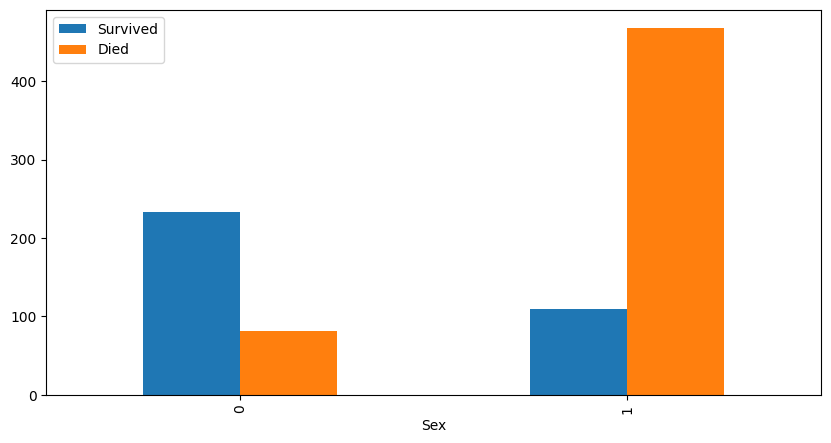

In [17]:
df1.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar',figsize=(10, 5))

In [33]:
ranges = [0,10,20,30,40,50,60,70,80,90,100]
df1.groupby(pd.cut(df1.Age,ranges))[['Died']].agg('sum')#.hist(column='Died')
df2['Age'].plot(kind='hist',bins=5)

NameError: name 'df2' is not defined

In [19]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Died
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,1
888,1,1,0,19.0,0,0,30.0000,0
889,0,3,0,27.0,1,2,23.4500,1


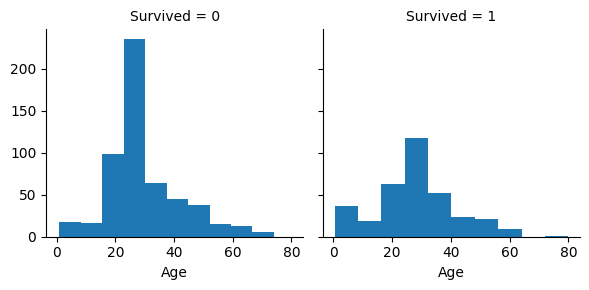

In [20]:
num = sns.FacetGrid(df1, col='Survived')
print(num.map(plt.hist, 'Age', bins=10))

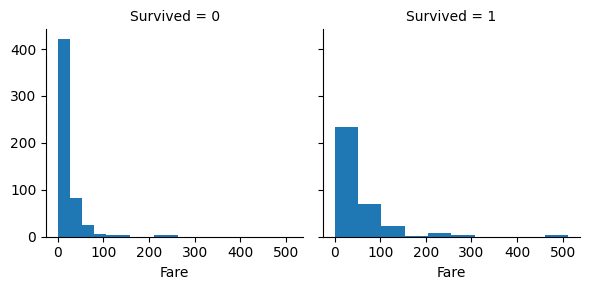

In [21]:
num = sns.FacetGrid(df1, col='Survived')
print(num.map(plt.hist, 'Fare', bins=10))

<AxesSubplot: xlabel='Pclass'>

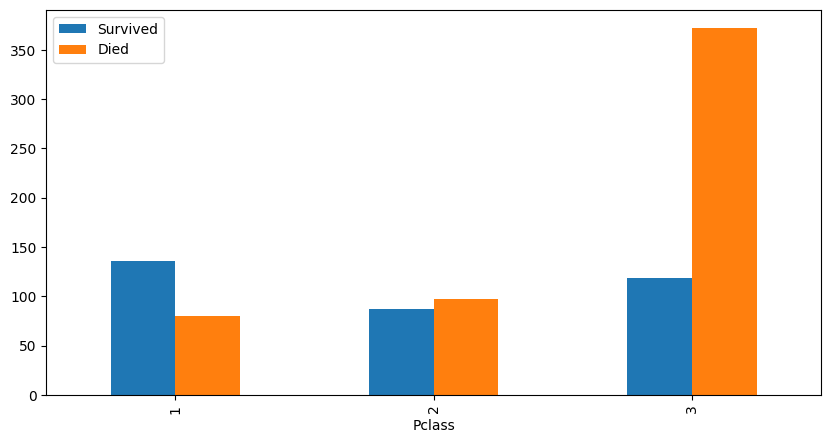

In [22]:
df1.groupby('Pclass').agg('sum')[['Survived','Died']].plot(kind='bar',figsize=(10, 5))

<AxesSubplot: xlabel='Parch'>

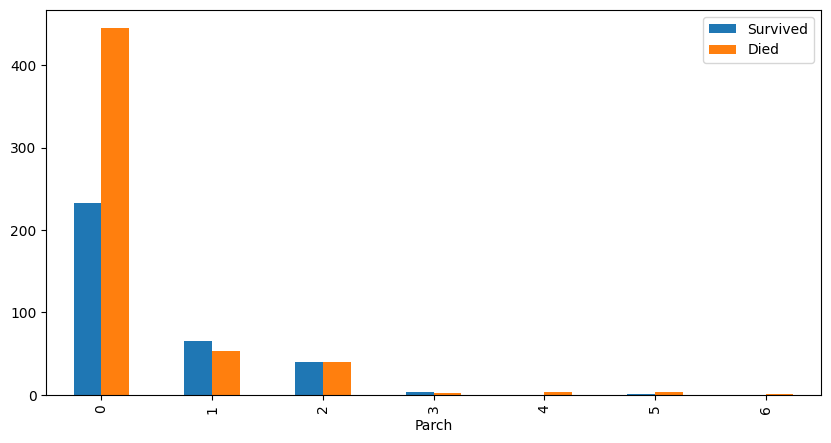

In [23]:
df1.groupby('Parch').agg('sum')[['Survived','Died']].plot(kind='bar',figsize=(10, 5))

<AxesSubplot: xlabel='SibSp'>

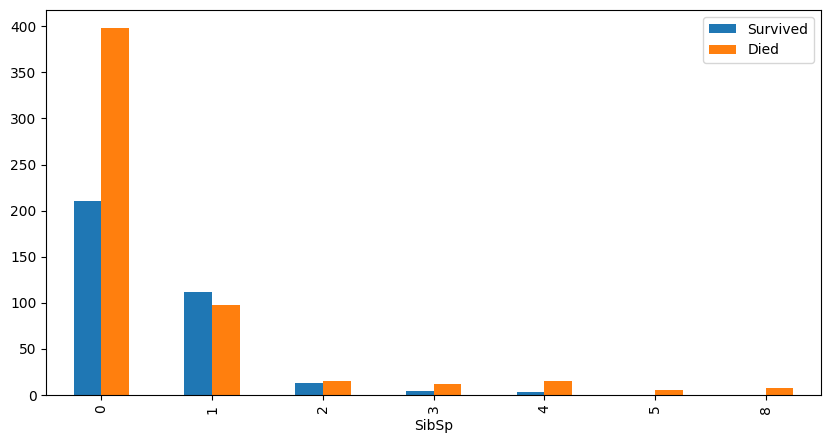

In [24]:
df1.groupby('SibSp').agg('sum')[['Survived','Died']].plot(kind='bar',figsize=(10, 5))

In [25]:
df1.drop(['Died'], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,27.0,1,2,23.4500


In [26]:
df1.iloc[:, 0]

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [27]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, 0]

X_training, X_validate, y_training, y_validate = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [28]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [29]:
acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_training,y_training)
    yhat = knn.predict(X_validate)
    acc.append(accuracy_score(y_validate,yhat))
    print("For k = ",i," : ",accuracy_score(y_validate,yhat))

For k =  1  :  0.8071748878923767
For k =  2  :  0.7623318385650224
For k =  3  :  0.7982062780269058
For k =  4  :  0.7713004484304933
For k =  5  :  0.8026905829596412
For k =  6  :  0.7937219730941704
For k =  7  :  0.7802690582959642
For k =  8  :  0.7488789237668162
For k =  9  :  0.7757847533632287
For k =  10  :  0.7443946188340808
For k =  11  :  0.7668161434977578
For k =  12  :  0.7623318385650224
For k =  13  :  0.7668161434977578
For k =  14  :  0.7488789237668162
For k =  15  :  0.7623318385650224
For k =  16  :  0.757847533632287
For k =  17  :  0.7802690582959642
For k =  18  :  0.7713004484304933
For k =  19  :  0.7892376681614349


In [30]:
y_validate

PassengerId
496    0
649    0
279    0
32     1
256    1
      ..
168    0
307    1
380    0
743    1
11     1
Name: Survived, Length: 223, dtype: int64

In [31]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X,y)
y_pred = KNN.predict(X_validate)
df_KNN = pd.DataFrame(index=X_validate.index)
#df_KNN["PassengerId"] = y_validate["PassengerId"]
df_KNN["Survived"] = y_pred

In [32]:
df_KNN

,Survived
PassengerId,
496,0
649,0
279,0
32,1
256,1
...,...
168,0
307,1
380,0
